In [4]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth

# Load the aggregated crime incident count data
agg_counts_df = pd.read_csv("aggCount_crime_inDistricts.csv")


# Load the GeoJSON file for the police districts 
# downloaded from https://data.cityofchicago.org/d/fthy-xz3r.
districts_geo = gpd.read_file("Chicago_Police_Districts.geojson")


In [5]:
agg_counts_df.head()

,district,crime_count
0,31,20
1,12,7507
2,22,6009
3,1,11759
4,6,13753


In [6]:
districts_geo.head()

,dist_label,dist_num,geometry
0,18TH,18,"MULTIPOLYGON (((-87.63068 41.92623, -87.6296 4..."
1,13TH,13,"MULTIPOLYGON (((-87.65742 41.90351, -87.65739 ..."
2,11TH,11,"MULTIPOLYGON (((-87.70679 41.90283, -87.70679 ..."
3,12TH,12,"MULTIPOLYGON (((-87.64111 41.88907, -87.6411 4..."
4,24TH,24,"MULTIPOLYGON (((-87.67424 42.023, -87.66541 42..."


In [7]:
# Check the first few rows of your dataframes

# Make sure district identifiers are of the same type
agg_counts_df['district'] = agg_counts_df['district'].astype(str)
districts_geo['dist_num'] = districts_geo['dist_num'].astype(str)


In [8]:
# Merge the aggregated counts with the GeoDataFrame
merged = districts_geo.set_index('dist_num').join(agg_counts_df.set_index('district'))


In [9]:
merged.head()

,dist_label,geometry,crime_count
dist_num,,,
18,18TH,"MULTIPOLYGON (((-87.63068 41.92623, -87.6296 4...",9500.0
13,13TH,"MULTIPOLYGON (((-87.65742 41.90351, -87.65739 ...",NaN
11,11TH,"MULTIPOLYGON (((-87.70679 41.90283, -87.70679 ...",26392.0
12,12TH,"MULTIPOLYGON (((-87.64111 41.88907, -87.6411 4...",7507.0
24,24TH,"MULTIPOLYGON (((-87.67424 42.023, -87.66541 42...",5244.0


/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_98908/3956526223.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['dist_label']):  # Change 'dist_num' to your district number column name


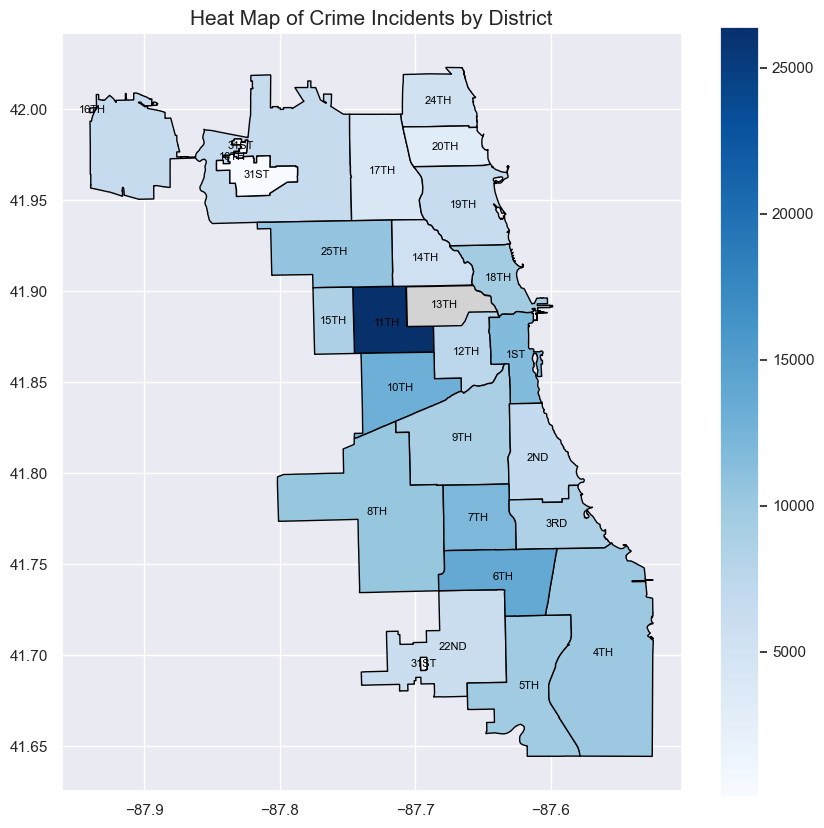

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set(style='darkgrid')

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the districts with the aggregated crime count as a heat map
merged.plot(column='crime_count',  # Change this to the name of your crime count column
            ax=ax,
            legend=True,
            cmap='Blues',  # Color map
            missing_kwds={"color": "lightgrey"},  # Color for missing values
            edgecolor='black')  # Border color of the districts

# Set the title
ax.set_title('Heat Map of Crime Incidents by District', fontdict={'fontsize': '15', 'fontweight': '3'})

# Annotate each district with its district number
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['dist_label']):  # Change 'dist_num' to your district number column name
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Save plot 
plt.savefig('heatmap_crimeIncidents_district_hardBorders.png', dpi=100, bbox_inches='tight')

# Show the plot
plt.show()

/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_98908/2346633403.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['geometry'] = merged.geometry.buffer(0.006)
/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_98908/2346633403.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['dist_label']):


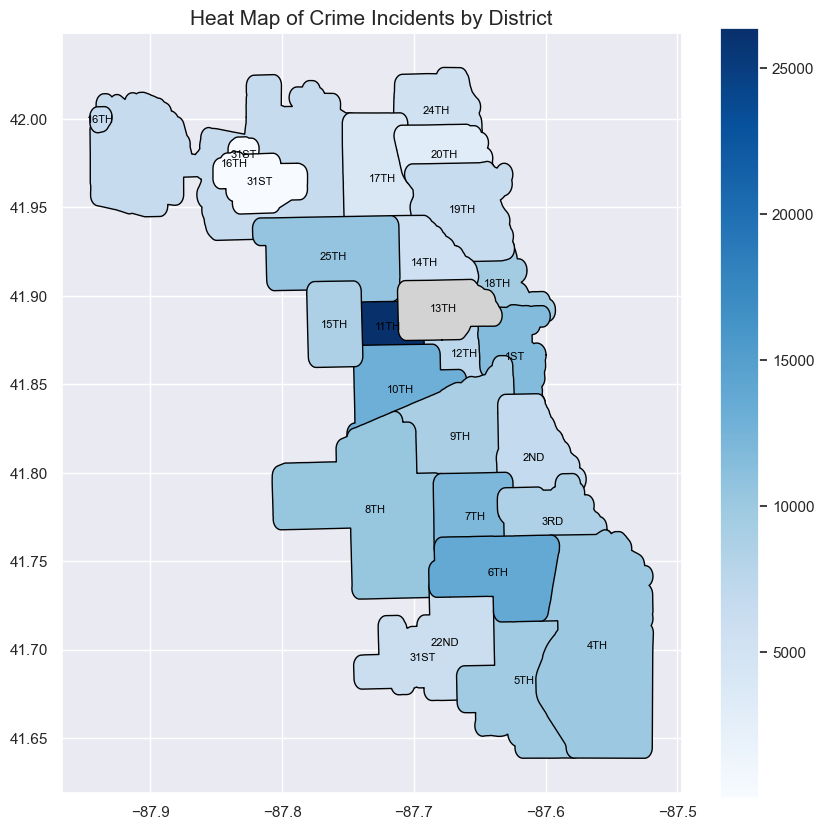

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import MultiPolygon

# style
sns.set(style='darkgrid')

# figure size 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Apply a buffer to soften borders
merged['geometry'] = merged.geometry.buffer(0.006)  


merged.plot(column='crime_count',
            ax=ax,
            legend=True,
            cmap='Blues',  # Color map
            missing_kwds={"color": "lightgrey"}, 
            edgecolor='black')  

# title
ax.set_title('Heat Map of Crime Incidents by District', fontdict={'fontsize': '15', 'fontweight': '3'})

# Annotate each district 
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['dist_label']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Save plot 
plt.savefig('heatmap_crimeIncidents_district_softBorder.png', dpi=100, bbox_inches='tight')

# Show the plot
plt.show()
